In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import functools
import operator
import random
import itertools as it

qualities=[]
num_parents_mating = 3
mutation_perc = 2
sol_per_pop = 8
IMG_DIMS = 32
M=IMG_DIMS
N=IMG_DIMS

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/My Drive/Colab Notebooks


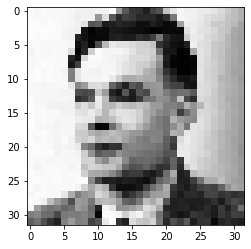

In [44]:
%cd /content/drive/My Drive/Colab Notebooks/
image = cv2.imread('turing.jpg')
image = cv2.resize(image, (IMG_DIMS, IMG_DIMS))
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap="gray")

In [45]:
def img2vector(img_arr):
  fv = np.reshape(a=img_arr,newshape=(functools.reduce(operator.mul, img_arr.shape)))
  return fv

def convert2img(chromo, imgshape):
  imgarr = np.reshape(a=chromo, newshape=imgshape)
  return imgarr

def initialPopulation (imgShape, nIndividuals=sol_per_pop): 
  random.seed (1)
  init_population = np.empty(shape=(nIndividuals,functools.reduce(operator.mul, imgShape)))
  for indv_num in range(nIndividuals):
    #np.random.randint(2, size=10)
    init_population[indv_num, :] = np.random.randint(256, size=M*N)
  return init_population

def fitness_fun (target_chrom, indiv_chrom): 
  error=-1*np.sum (np.abs (indiv_chrom-target_chrom))
  return error

def calPopFitness (target_chrom, pop): 
  qualities = np.zeros(pop.shape[0])
  for indiv_num in range(pop.shape[0]):
    qualities [indiv_num] = fitness_fun (target_chrom, pop[indiv_num, :])
  return qualities

def getbestparents(population,qualities,n=1600):
  parents=[]
  indx=np.argsort(qualities)[::-1]
  n_fit=np.sort(qualities)[::-1]
  best_parent_indx=indx[0:n] 
  for i in best_parent_indx: 
    parents.append(population [i])
  parents=np.array(parents)
  return parents

In [46]:
def crossover (parents, imgShape, nIndividuals=sol_per_pop):
  new_population = np.empty (shape=(nIndividuals, functools.reduce(operator.mul, imgShape)), dtype=np. uint8) 
  new_population[0: parents.shape[0], :]=parents
  num_newly_generated = nIndividuals-parents.shape[0]
  parents_permutations = list(it.permutations (iterable=np.arange(0, parents.shape[0]), r=2)) 
  selected_permutations = random.sample (range(len(parents_permutations)),num_newly_generated)
  comb_idx = parents.shape[0]
  for comb in range(len(selected_permutations)): 
    selected_comb_idx= selected_permutations [comb]
    selected_comb = parents_permutations [selected_comb_idx]
    cross_size = np.int32((new_population.shape[1])/5)
    new_population[comb_idx+comb, 0:cross_size]= parents [selected_comb[0],0:cross_size]
    new_population[comb_idx+comb, cross_size: ] = parents [selected_comb[1],cross_size:]
  return new_population

def mutation(population, numParentsMating, mutPercent):
  for indx in range(numParentsMating, population.shape[0]):
    rand_indx = np. uint32(np.random.random(size=np.uint32(mutPercent/100*population.shape[1]))*population.shape[1])
    # print(len(rand_indx))
    new_values =np.random.randint(256, size=len(rand_indx))
    population[indx, rand_indx] = new_values
  return population

def saveImage (qualities, population, imshape):
  best_solution_chrom=population[np.where(qualities ==np.max(qualities))[0][0], :]
  best_solution_img = convert2img(best_solution_chrom, imshape)
  fig,a= plt.subplots(1,2)
  a[0].imshow(best_solution_img, cmap="gray")
  a[1].imshow(gray_image, cmap="gray")

In [47]:
population=initialPopulation((M,N))
img_vec=img2vector(gray_image)

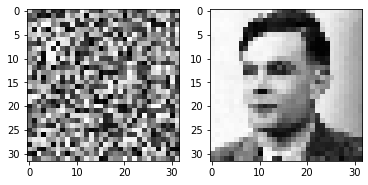

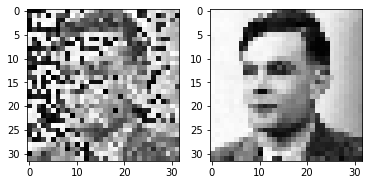

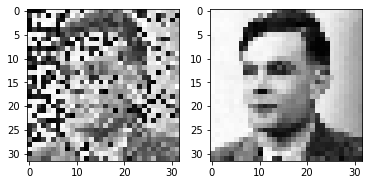

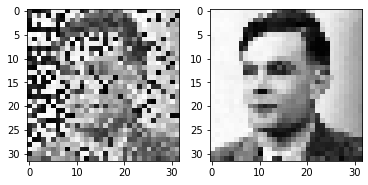

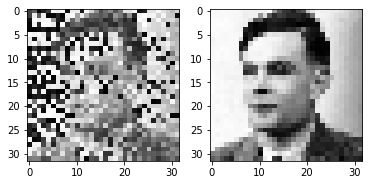

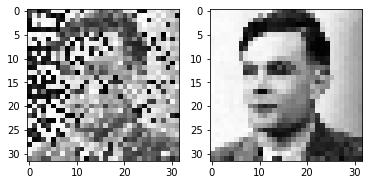

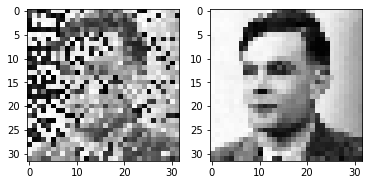

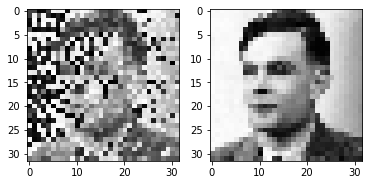

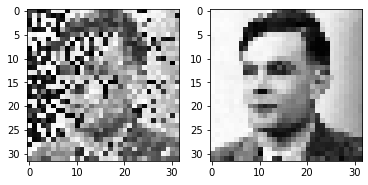

In [48]:
for iteration in range(15000000):
  qualities = calPopFitness(img_vec , population)
  parents = getbestparents(population, qualities,num_parents_mating)
  population = crossover(parents, (M,N),nIndividuals=sol_per_pop)
  population = mutation (population=population,numParentsMating=num_parents_mating, mutPercent=mutation_perc)
  if iteration%2000000==0 :
    saveImage (qualities, population, (M,N))

saveImage (qualities, population, (M,N))

In [49]:
from sklearn.metrics import balanced_accuracy_score

actual = img2vector(gray_image)
pred = population[np.where(qualities ==np.max(qualities))[0][0], :]
print("accuracy = " + str(balanced_accuracy_score(actual , pred)*100))

accuracy = 3.0670577409707844


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


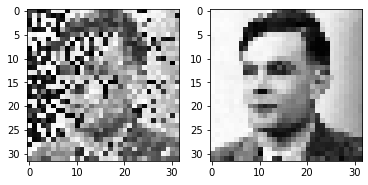

In [52]:
saveImage (qualities, population, (M,N))